### Brownian Motion



Monte Carlo simulation (also known as the Monte Carlo Method) lets you see all the possible outcomes of maintenance planning decisions and assess the impact of risk, thus allowing for better decision making under uncertainty.



In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [8]:
### The brownian motion timestep is n

n = 5000

###  two independent one-dimensional Brownian processes

x = np.cumsum(np.random.randn(n))
y = np.cumsum(np.random.randn(n))

In [9]:
x

array([  1.05802279,   1.90300977,   2.32510776, ..., -12.22155421,
       -12.38185591, -12.67486381])

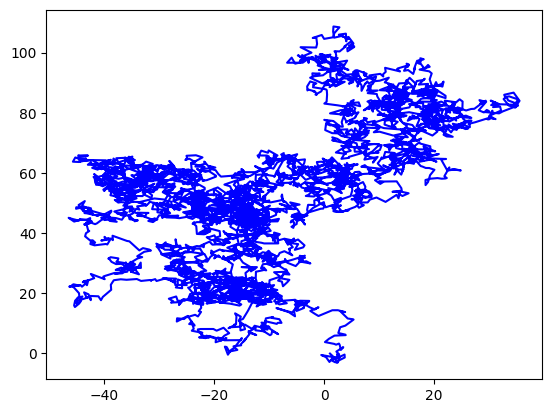

In [10]:
plt.plot(x, y, c='b')
# xmax, xmin, ymax, ymin = x.max(), x.min(), y.max(), y.min()
# scale_factor = 1.25
# xmax, xmin, ymax, ymin = xmax * scale_factor, xmin * scale_factor, ymax * scale_factor, ymin * scale_factor
# plt.xlim(xmin, xmax)
# plt.ylim(ymin, ymax)
plt.show()

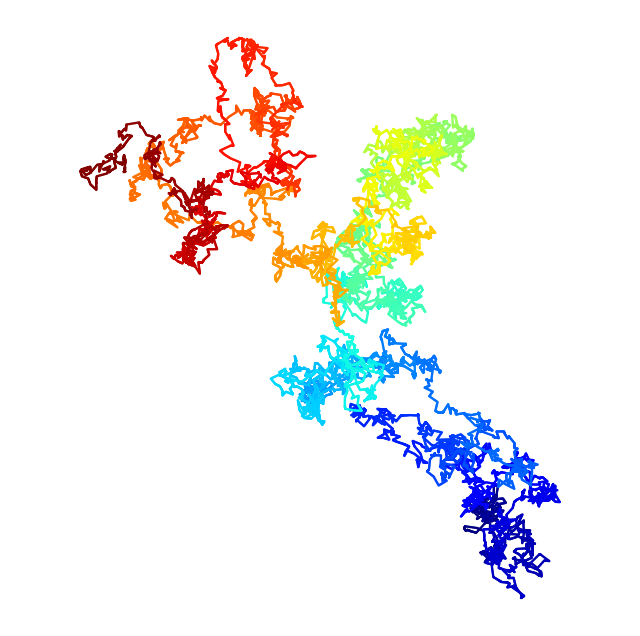

In [3]:
# We add 10 intermediary points between two
# successive points. We interpolate x and y.
k = 10
x2 = np.interp(np.arange(n * k), np.arange(n) * k, x)
y2 = np.interp(np.arange(n * k), np.arange(n) * k, y)
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# Now, we draw our points with a gradient of colors.
ax.scatter(x2, y2, c=range(n * k), linewidths=0,
           marker='o', s=3, cmap=plt.cm.jet,)
ax.axis('equal')
ax.set_axis_off()

In [4]:
def gen_normal(n):
    w = np.zeros(n)
    for i in range(1, n):
        yi = np.random.normal()
        w[i] = w[i-1] + yi / np.sqrt(n)
    return w

def gen_random_walk(n):
    w = np.zeros(n)
    for i in range(1, n):
        yi = np.random.choice([1, -1])
        w[i] = w[i-1] + yi / np.sqrt(n)
        
    return w

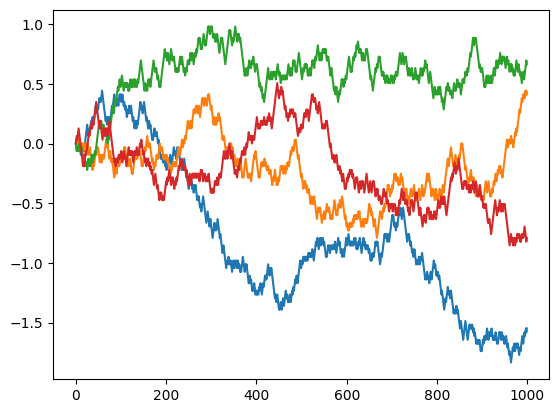

In [5]:
for i in range(4):
    plt.plot(gen_random_walk(1000))
plt.show()

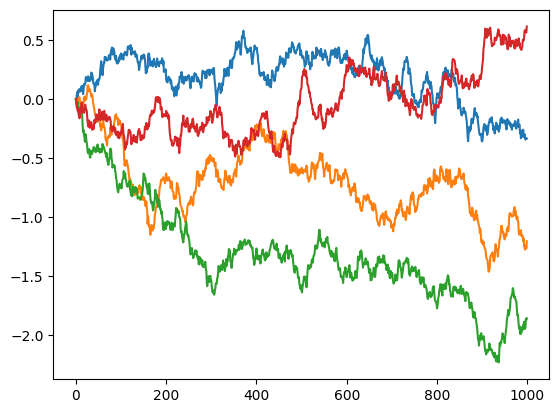

In [6]:
for i in range(4):
    plt.plot(gen_normal(1000))
plt.show()

### Markov Chains

Markov chains are relatively easy to study mathematically and to simulate numerically. We will simulate a simple Markov chain modeling the evolution of a population.

In [105]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We consider a population that cannot comprise more than N=100 individuals, and define the birth and death rates:

In [106]:
N = 100
birth_rate = 0.5
death_rate = 0.5

nsteps = 1000

  

Chain simulation

In [141]:
def one_simulation(birth_rate, death_rate, nsteps=1000, init_individuals=25, N=100):
    evolution = np.zeros(nsteps)
    evolution[0] = init_individuals # there are 25 individuals in the population at initialization time
    for t in range(nsteps-1):
        if 0 < evolution[t] < N:
            birth = np.random.rand() <= birth_rate
            death = np.random.rand() <= death_rate
            evolution[t + 1] = evolution[t] + 1 * birth - 1 * death

        else:
            evolution[t + 1] = evolution[t]
    return evolution


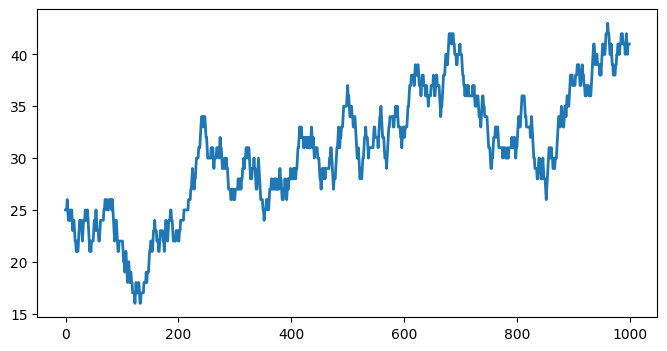

In [142]:
x = one_simulation(0.5, 0.5, nsteps=1000)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(x, lw=2)

In [143]:
x

array([25., 25., 25., 26., 25., 24., 24., 25., 24., 24., 25., 25., 24.,
       23., 24., 24., 23., 22., 22., 21., 22., 21., 21., 22., 23., 24.,
       24., 24., 24., 23., 22., 23., 24., 24., 24., 25., 24., 24., 24.,
       25., 24., 23., 22., 21., 22., 21., 22., 22., 22., 22., 23., 24.,
       23., 24., 25., 24., 23., 23., 23., 22., 22., 23., 24., 24., 24.,
       24., 24., 24., 25., 25., 26., 26., 26., 26., 25., 25., 25., 26.,
       26., 26., 26., 26., 25., 26., 25., 24., 23., 22., 23., 24., 24.,
       23., 22., 21., 21., 22., 22., 22., 22., 22., 22., 22., 21., 20.,
       20., 19., 20., 21., 20., 19., 18., 19., 20., 19., 18., 19., 19.,
       18., 18., 17., 17., 17., 17., 16., 17., 18., 17., 17., 17., 18.,
       18., 17., 16., 16., 17., 17., 17., 17., 17., 18., 18., 18., 18.,
       19., 18., 19., 19., 19., 20., 21., 21., 22., 22., 21., 21., 22.,
       23., 23., 24., 23., 23., 23., 22., 22., 22., 21., 21., 22., 23.,
       23., 23., 23., 23., 22., 22., 21., 22., 23., 24., 23., 23

In [144]:
def simulate(mc_trials=1000): # Monte Carlo trials count
    nsteps = 100
    res = np.zeros((mc_trials, nsteps))
    for i in range(mc_trials):
        init = np.random.randint(0, 100)
        res[i] = one_simulation(birth_rate=0.5, death_rate=0.5, init_individuals=init, nsteps=nsteps)
        
    return res


res = simulate(10)

In [145]:
res[:, -1].shape

(10,)

In [146]:
res.shape

(10, 100)

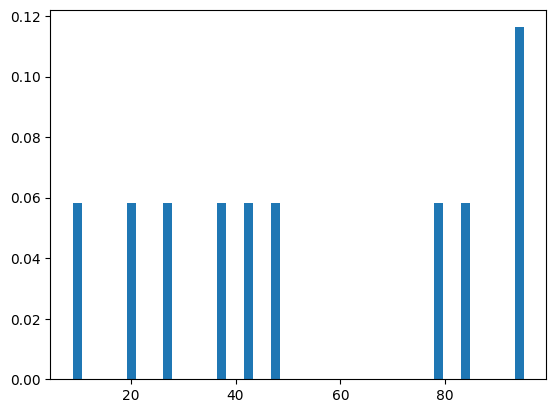

In [148]:
plt.hist(res[:, -1], bins=50, density=True)
plt.show()

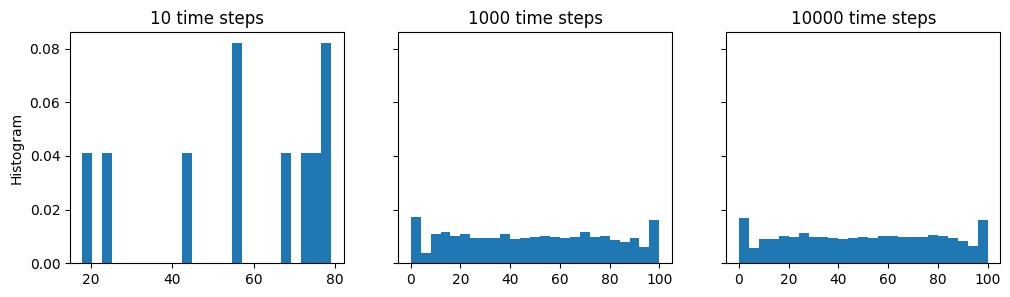

In [149]:
bins = np.linspace(0, 100, 25)
mc_nsteps_list = [10, 1000, 10000]

fig, axes = plt.subplots(1, len(mc_nsteps_list), figsize=(12, 3), sharey=True)

for i, nsteps in enumerate(mc_nsteps_list):
    ax = axes[i]
    res = simulate(nsteps)
    ax.hist(res[:, -1], bins=25, density=True)
    ax.set_label("Population size")
    if i == 0:
        ax.set_ylabel("Histogram")

    ax.set_title(f"{nsteps} time steps")

Suppose you have a secret number (make it an integer) between 1 and 5. We will call it your initial number at step 1. Now for each time step, your secret number will change according to the following rules:

Flip a coin.
If the coin turns up heads, then increase your secret number by one (5 increases to 1).
If the coin turns up tails, then decrease your secret number by one (1 decreases to 5).
Repeat n
 times, and record the evolving history of your secret number.

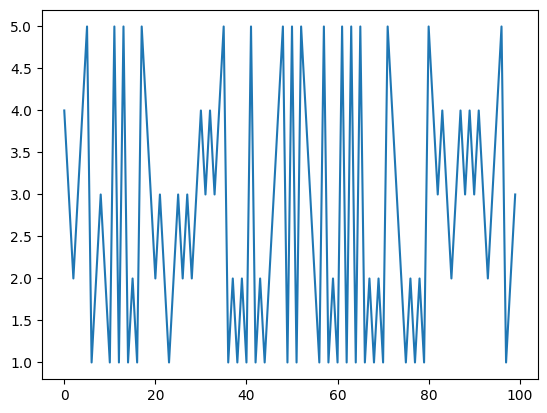

In [150]:
ntrials = 100

def numbers(ntrials):
    markov_chain = np.zeros(ntrials)
    markov_chain[0] = 4
    res = np.array([1, 2, 3, 4, 5])
    for i in range(1, ntrials):
        u = np.random.uniform()
        if u < 0.5:
            markov_chain[i] = markov_chain[i-1] % 5 + 1
        else:
            markov_chain[i] = markov_chain[i-1] - 1 if markov_chain[i-1] != 1 else 5

    return markov_chain
# plt.figure()
plt.plot(range(ntrials), numbers(ntrials))
plt.show()

In [152]:
values, counts = np.unique(numbers(100000), axis=0, return_counts=True)

values, counts / ntrials

(array([1., 2., 3., 4., 5.]), array([201.13, 200.37, 198.73, 199.35, 200.42]))

### The transition matrix

In [163]:
Q = np.array([[0.0, 0.5, 0.0, 0.0, 0.5],
              [0.5, 0.0, 0.5, 0.0, 0.0],
              [0.0, 0.5, 0.0, 0.5, 0.0],
              [0.0, 0.0, 0.5, 0.0, 0.5],
              [0.5, 0.0, 0.0, 0.5, 0.0]])

np.linalg.matrix_power(Q, 100)

array([[0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2]])

Random walk (continuous)
Now let’s look at a continuous example of a Markov chain. Say $X_t=0$
 and we have the following transition model: $p(X_t+1|X_t=x_t)=N(x_t,1)$
. That is, the probability distribution for the next state is Normal with variance 1 and mean equal to the current state. This is often referred to as a “random walk.” Clearly, it is a Markov chain because the transition to the next state $X_t+1$
 only depends on the current state $X_t$
.


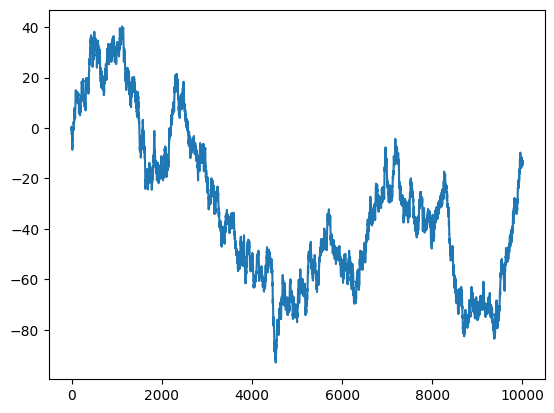

In [125]:
ntrials = 10000
random_walk = np.zeros(ntrials)

for i in range(ntrials-1):
    random_walk[i+1] = np.random.normal(loc=random_walk[i])


plt.plot(range(ntrials), random_walk)

$P(y_i|\mu) \sim N(\mu, 1), i = 1, ..., n$

$\mu \sim t(0, 1, 1)$

$p(\mu|y_1, ..., y_n) \sim exp[n (\bar{y} \mu - \mu^2/2)]/(1+\mu^2)$

### Continuous example
The continuous random walk example we gave earlier does not have a stationary distribution. However, we can modify it so that it does have a stationary distribution.


Let the transition distribution be $p(X_t+1|X_t=x_t)=N(\phi x_t,1), where −1<\phi<1$
. That is, the probability distribution for the next state is Normal with variance $1$ and mean equal to $\phi$
 times the current state. As long as $\phi$ is between $−1$ and $1$, then the stationary distribution will exist for this model.

Let’s simulate this chain for $\phi=−0.6$
.

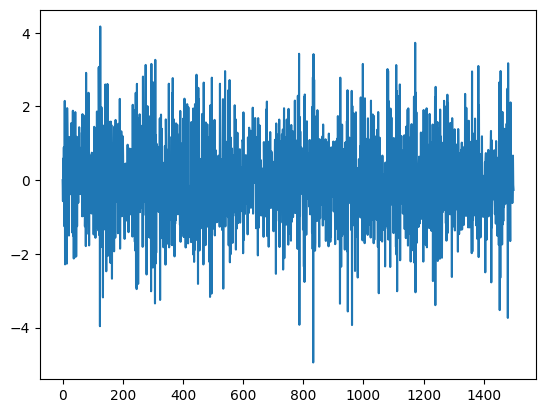

In [174]:
n = 1500
x = np.zeros(n)
phi = -0.6

for i in range(1, n):
  x[i] = np.random.normal(loc=phi*x[i-1])

plt.plot(x)

The theoretical stationary distribution for this chain is normal with mean 0 and variance $1/(1−\phi^2)$, which in our example approximately equals 1.562. Let’s look at a histogram of our chain and compare that with the theoretical stationary distribution.

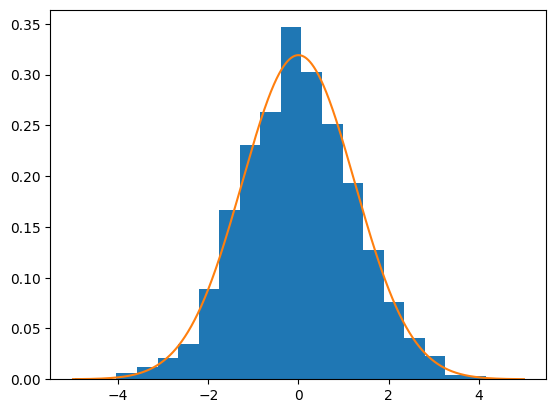

In [175]:
import scipy.stats as st

plt.hist(x, bins=20, density=True)
y = np.linspace(-5, 5, 1500)
plt.plot(y, st.norm.pdf(y, scale=(1/(1-phi**2)**0.5)))
plt.show()

In [61]:
def simulate(x, nsteps, ntrials):
    """Run the simulation."""
    for _ in range(nsteps - 1):
        # Which trials to update?
        upd = (0 < x) & (x < N - 1)
        # In which trials do births occur?
        birth = 1 * (np.random.rand(ntrials) <= a ) #* x)
        # In which trials do deaths occur?
        death = 1 * (np.random.rand(ntrials) <= b ) #* x)
        # We update the population size for all trials
        x[upd] += birth[upd] - death[upd]

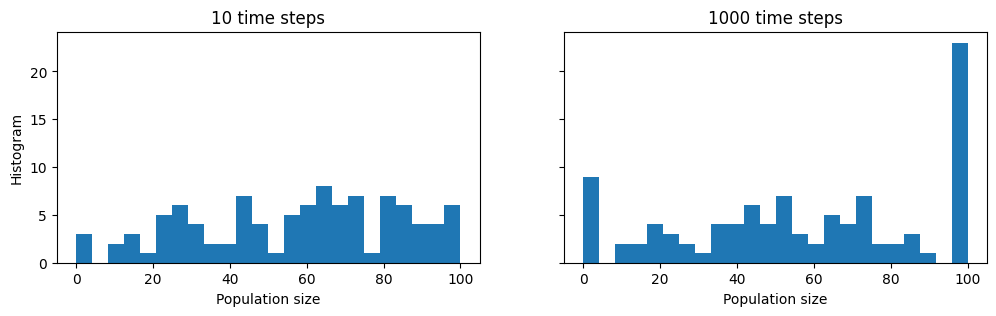

In [64]:
a = 0.5
b = 0.5

ntrials = 100
x = np.random.randint(size=ntrials,
                      low=0, high=N)


bins = np.linspace(0, N, 25)
nsteps_list = [10, 1000] #, 10000]
fig, axes = plt.subplots(1, len(nsteps_list),
                         figsize=(12, 3),
                         sharey=True)
for i, nsteps in enumerate(nsteps_list):
    ax = axes[i]
    simulate(x, nsteps, ntrials)
    ax.hist(x, bins=bins)
    ax.set_xlabel("Population size")
    if i == 0:
        ax.set_ylabel("Histogram")
    ax.set_title(f"{nsteps} time steps")

In [65]:
x

array([19, 99, 14,  0, 99, 35, 99, 71, 82, 82, 62,  0, 64, 52, 99, 99, 99,
       27, 74, 99, 73, 62, 45, 99, 63, 70, 43,  0, 99, 79, 42, 36, 35, 52,
       74, 87, 54, 47, 19, 63, 74, 99, 99, 50, 22, 74, 91, 40, 74,  0,  0,
       58, 22,  0, 11, 53, 41, 67, 58, 48, 99, 64, 76, 50, 99, 99, 27, 22,
       99, 66, 37, 17,  0, 99, 54, 42,  0, 99, 99, 41, 99, 84, 96, 43, 84,
       33, 99, 16, 99, 19, 70, 49, 55, 99, 10, 39, 44, 46,  0, 69])